# Problem $#1$ Multivariable Linear Regression
## Proposed model y =  W<sub>1</sub> * x<sub>1</sub> + W<sub>2</sub> * x<sub>2</sub> + b</sub>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

# 3D Plot
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #Required by 3d Graphs

In [2]:
# The Data - Load From File
data = pd.DataFrame.from_csv('tabla_1.csv')
data.head()

,x1,x2,y
0,0.910575,0.598773,-9.905582
1,4.461310,7.219752,46.269191
2,1.964195,0.887122,6.377303
3,4.479097,3.077765,38.742128
4,4.557191,3.418313,27.931386


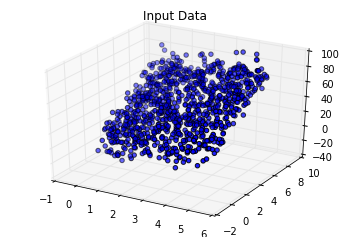

In [3]:
# Print the 3D input data points
mpl.rcParams['legend.fontsize'] = 10
figure = plt.figure()
ax = figure.gca(projection='3d')
ax.scatter(data['x1'], data['x2'], data['y'])
plt.title('Input Data')
plt.show()

### Normalize data with z-score - data not converging

In [4]:
data_x1_normalized = (data['x1'] - data['x1'].mean()) / data['x1'].std()
data_x2_normalized = (data['x2'] - data['x2'].mean()) / data['x2'].std()
data_y_normalized = (data['y'] - data['y'].mean()) / data['y'].std()

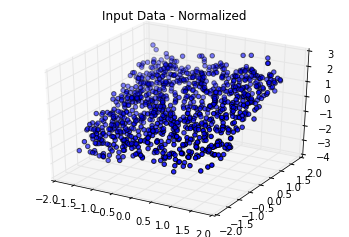

In [5]:
# Plot
figure = plt.figure()
ax = figure.gca(projection='3d')
ax.scatter(data_x1_normalized, data_x2_normalized, data_y_normalized)
plt.title('Input Data - Normalized')
plt.show()

In [6]:
# Definir variables de TensorFlow
W1 = tf.Variable(0.0, dtype=tf.float32)
W2 = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [7]:
# Hypothesis
hypothesis = W1*x1 + W2*x2 + b

In [8]:
# Cost
cost = tf.reduce_mean(tf.square(hypothesis - y))

In [9]:
# Minimize
alpha = tf.Variable(0.001)  # alpha = Tasa de aprendizaje
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

In [10]:
# Start all variables after execute nodes
init = tf.global_variables_initializer()

# Launch the graph
session = tf.Session()
session.run(init)

In [11]:
print('Iteration - Error - W1 - W2 - b')
for i in range(10000):
    session.run(train, {x1: data_x1_normalized, x2: data_x2_normalized, y: data_y_normalized})
    if i % 100 == 0:
        # Line description: iteration, error, computed values
        print(i, session.run(cost, {x1: data_x1_normalized, x2: data_x2_normalized, y: data_y_normalized}),
              session.run(W1), session.run(W2), session.run(b))

Iteration - Error - W1 - W2 - b
0 0.995788 0.000369365 0.00175468 2.42144e-11
100 0.731846 0.0336036 0.160586 2.17697e-10
200 0.555302 0.0604624 0.290554 4.37605e-10
300 0.437212 0.0821652 0.396903 7.59377e-10
400 0.358221 0.0996989 0.483927 9.3726e-10
500 0.305381 0.113862 0.555137 1.11887e-09
600 0.270034 0.1253 0.613409 1.26695e-09
700 0.246389 0.134536 0.661092 1.4439e-09
800 0.23057 0.141992 0.700112 1.65065e-09
900 0.219988 0.148011 0.732042 1.90025e-09
1000 0.212908 0.152868 0.758171 2.02504e-09
1100 0.208172 0.156787 0.779553 2.11445e-09
1200 0.205003 0.159948 0.79705 2.30258e-09
1300 0.202883 0.162497 0.811368 2.44041e-09
1400 0.201464 0.164553 0.823086 2.59501e-09
1500 0.200515 0.16621 0.832675 2.91725e-09
1600 0.19988 0.167546 0.840522 3.17988e-09
1700 0.199455 0.168622 0.846944 3.45183e-09
1800 0.199171 0.169489 0.852199 3.70142e-09
1900 0.19898 0.170187 0.8565 3.80014e-09
2000 0.198853 0.170749 0.86002 3.82622e-09
2100 0.198768 0.171201 0.862901 3.90632e-09
2200 0.198711 0

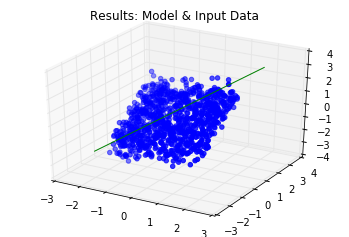

Predictions x1 & x2 
23.5731480007


In [12]:
# Plot Prediction line & Normalized data
# Generate points for the model
model_x1 = np.linspace(-2, 2, 100)
model_x2 = np.linspace(-2, 3, 100)
model_y = session.run(hypothesis, {x1: model_x1, x2: model_x2})

# Print the 3D points data
figure = plt.figure()
ax = figure.gca(projection='3d')
ax.scatter(data_x1_normalized, data_x2_normalized, data_y_normalized, color='blue')
plt.plot(model_x1, model_x2, model_y, color='green')
plt.title('Results: Model & Input Data')
plt.show()

# The Predictions
print('Predictions x1 & x2 ') 
prediction_x1 = 3.0197793341559116
prediction_x2 = 2.196352103404298

prediction_x1_normalized = (prediction_x1 - data['x1'].mean()) / data['x1'].std()
prediction_x2_normalized = (prediction_x2 - data['x2'].mean()) / data['x2'].std()
# print('prediction_x1_normalized')
# print(prediction_x1_normalized)

prediction_y_normalized = session.run(hypothesis, {x1: prediction_x1_normalized, x2: prediction_x2_normalized})
prediction_y = (prediction_y_normalized * data['y'].std()) + data['y'].mean()
print(prediction_y)

# sys.exit()